## How observable would these binaries be in terms of photometry and radial velocity?

With a model of the lithium-rich giants at the red clump being binaries, this present some properties that we might be able to observe with our current data sets.

* With photometry we might expect some proportion to be eclipsing binaries.
    * How many would have the right inclination?
    * How big would the dips be?
* With radial velocities, we would expect to observe radial velocity variations.


In [4]:
import ellc
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import seaborn as sns
from scipy.stats import truncnorm



Our representative case has the following properties

In [5]:
mass1 = 1.5 *u.solMass
mass2 = 1.0 *u.solMass
m_t = mass1 + mass2
radius1 = 10. * u.solRad
radius2 = 1. * u.solRad
r_t = radius1 + radius2

q = mass1 / mass2
p = np.arange(279,2790,1) * u.day

sbratio = 10**((4.83 - +0.5)/-2.5) #RC stars are M_V = +0.5 and the Sun is M_V = 4.83


We can work out the probability that there will an eclipse of any depth assuming a uniform distribution of inclinations

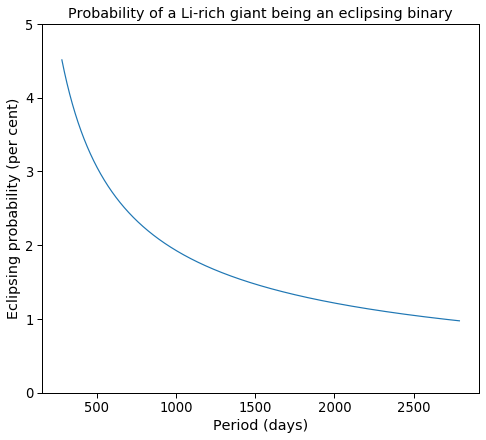

In [6]:

prob_period = r_t * np.power(2*np.pi/p ,2/3) * np.power(const.G * m_t, -1/3)
sns.set_context("paper", font_scale=1.5)
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(3.32*2, 3*2),
                         sharey=True, constrained_layout=True)

axes.plot(p, prob_period.decompose()*100)
axes.set_ylim(0,5)
axes.set_title("Probability of a Li-rich giant being an eclipsing binary")
axes.set_xlabel("Period (days)")
axes.set_ylabel("Eclipsing probability (per cent)")
plt.show()

How many of our sample might we expect to observe as binaries?

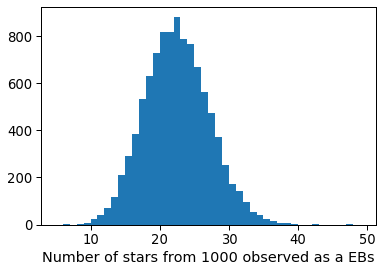

So we might expect 22+5-5 EBs


In [14]:
# We only want periods between 279 and 2790 days. These are randomly selected from a normal distribution of the log of the period.

myclip_a = np.log10(279)
myclip_b = np.log10(2790)
my_mean = 5.03
my_std = 2.28

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

# This creates 10000 samples of 1000 stars with normally distributed log(periods)
log_period_rand = truncnorm.rvs(a=a,
                                b=b,
                                loc=my_mean,
                                scale=my_std, size=(1000,10000))
period_rand = (10**log_period_rand)

# Calculate the probability that for our representative case that such a period would result in an eclipsing binary
prob_period = np.array((r_t * np.power(2*np.pi/(period_rand*u.day) ,2/3) * np.power(const.G * m_t, -1/3)).decompose())

# How many of each of the 10000 samples would we observe?
number_observed = np.sum(prob_period > np.random.random((len(prob_period),10000)), axis=0)
percentile_ranges = np.percentile(number_observed,[16,50,84])
plt.hist(number_observed, bins=np.arange(5,50,1))
plt.xlabel("Number of stars from 1000 observed as a EBs")
plt.show()
print(f"So we might expect {percentile_ranges[1]:0.0f}+{percentile_ranges[2]-percentile_ranges[1]:0.0f}-{percentile_ranges[1]-percentile_ranges[0]:0.0f} EBs")

## What would be the observability of these binaries?

Very simple geometry:

In [8]:
print(f"For a primary of {radius1} and a secondary of {radius2}, the eclipse would block {((radius2/radius1)**2)*100:0.1f}%")

For a primary of 10.0 solRad and a secondary of 1.0 solRad, the eclipse would block 1.0%


Fancier geometry:

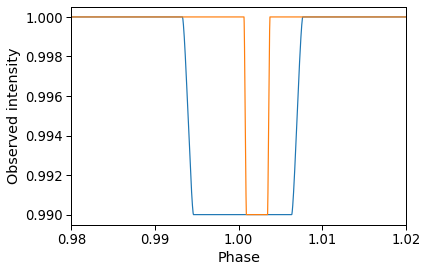

In [34]:
for period in p[[0,-1]]:
    seperation = (((const.G * m_t)/(4*np.pi**2) * period**2)**(1/3))

    t_obs = np.linspace(0.9,1.1,10001)
    incl = 90

    lc = ellc.lc(t_obs,
                 (radius1 / seperation).decompose(),
                 (radius2 / seperation).decompose(),
                 sbratio,
                 incl,
                 a=seperation.to(u.solRad).value,
                 q=q)
    plt.plot(t_obs, lc)
plt.xlim(0.98,1.02)
plt.xlabel("Phase")
plt.ylabel("Observed intensity")
plt.show()

## What about the RV variation?

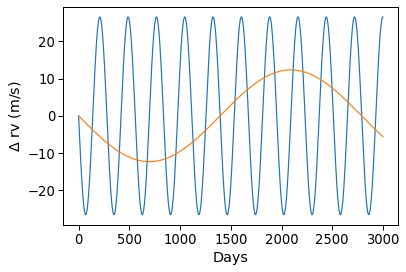

In [35]:
for period in p[[0,-1]]:
    seperation = (((const.G * m_t)/(4*np.pi**2) * period**2)**(1/3))

    t_obs = np.linspace(0,3000,1000)
    
    incl = 90

    rv1, rv2 = ellc.rv(t_obs,
                 (radius1 / seperation).decompose(),
                 (radius2 / seperation).decompose(),
                 sbratio,
                 incl,
                 a=seperation.to(u.solRad).value,
                 q=q,
                 period=period.value)
    plt.plot(t_obs, rv1)
# plt.xlim(0.98,1.02)
plt.xlabel("Days")
plt.ylabel(r"$\Delta$ rv (m/s)")
plt.show()